# Stock Price Prediction using Neural Nets

In [1]:
#Importing #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xg 
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor

In [2]:
#importing the yfinance API to retrieve the stock data of any company.
#!pip install yfinance
import yfinance as yf

In [76]:
#retreiveing the stock data of 10 companys
#(Starbucks, Microsoft, Cisco, Qualcomm,Facebook, Amazon, Tesla, Advanced Micro Devices, Zynga, Apple)
import yfinance as yf

#list of companies to iterate over
companies = ['SBUX','MSFT', 'CSCO','QCOM', 'FB', 'AMZN', 'TSLA','AMD','ZNGA', 'AAPL']
data = pd.DataFrame()

#iterating on the company list to retrieve all company's stock data and storing all in a dataframe
for company in companies:
    x = yf.download(company, start="2015-01-01", end="2020-10-30")
    x['company'] = company
    data= pd.concat([data, x])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [77]:
#Reseting the index
#Having a look at the dataset of all stock data
data.head()

,Open,High,Low,Close,Adj Close,Volume,company
Date,,,,,,,
2015-01-02,41.064999,41.490002,40.445000,40.720001,36.551796,6886000,SBUX
2015-01-05,40.070000,40.334999,39.744999,39.939999,35.851631,11623800,SBUX
2015-01-06,40.169998,40.195000,39.279999,39.615002,35.559906,7664400,SBUX
2015-01-07,39.875000,40.615002,39.700001,40.590000,36.435104,9732600,SBUX
2015-01-08,41.165001,41.650002,41.009998,41.244999,37.023052,13170600,SBUX


In [78]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,company
Date,,,,,,,
2020-10-23,116.389999,116.550003,114.279999,115.040001,114.841873,82572600,AAPL
2020-10-26,114.010002,116.550003,112.879997,115.050003,114.851852,111850700,AAPL
2020-10-27,115.489998,117.279999,114.540001,116.599998,116.399178,92276800,AAPL
2020-10-28,115.050003,115.430000,111.099998,111.199997,111.008476,143937800,AAPL
2020-10-29,112.370003,116.930000,112.199997,115.320000,115.121384,146129200,AAPL


In [79]:
#Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14680 entries, 2015-01-02 to 2020-10-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       14680 non-null  float64
 1   High       14680 non-null  float64
 2   Low        14680 non-null  float64
 3   Close      14680 non-null  float64
 4   Adj Close  14680 non-null  float64
 5   Volume     14680 non-null  int64  
 6   company    14680 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 917.5+ KB


# Exploratory data Analysis

In [80]:
#Looking at the descriptive statistics of all the companies
print('Descriptive statistics for Starbucks')
data[data['company']=='SBUX'].describe()

Descriptive statistics for Starbucks


,Open,High,Low,Close,Adj Close,Volume
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1.468000e+03
mean,63.832728,64.407337,63.236870,63.848294,60.482260,9.436154e+06
std,12.965909,13.089931,12.806859,12.944157,13.987213,4.847275e+06
min,39.630001,40.195000,39.279999,39.615002,35.559906,1.847800e+06
25%,55.449999,55.864999,54.939999,55.395001,51.270032,6.592125e+06
50%,58.389999,58.910000,57.855000,58.355000,54.306337,8.138800e+06
75%,73.474998,74.300001,72.209999,73.597498,71.888002,1.085262e+07
max,98.139999,99.720001,97.209999,99.110001,96.259361,6.209110e+07


This descriptive statistics gives a good amount of information about the stock. The mean closing price of the stock between the year 2017-2020 is 63.84 . The stock has been at its lowest price at 39.6 and the highest peak touched by the stock is 99.7 . The average amount of the volumne of the stock been exhange in this 3-year period is 9436154stocks/day.

In [81]:
#Defining a function to get statistic for any company.
def get_stats(company):
    print('Descriptive statistics for ' +str(company))
    print(data[data['company']==company].describe())

get_stats('TSLA')

Descriptive statistics for TSLA
              Open         High          Low        Close    Adj Close  \
count  1468.000000  1468.000000  1468.000000  1468.000000  1468.000000   
mean     79.829943    81.594879    78.001113    79.887567    79.887567   
std      79.698514    82.124741    77.057596    79.764374    79.764374   
min      28.464001    30.993999    28.209999    28.733999    28.733999   
25%      45.382499    45.973999    44.519500    45.269501    45.269501   
50%      55.674000    56.424002    54.825998    55.691999    55.691999   
75%      68.688000    69.718002    67.437000    68.705002    68.705002   
max     502.140015   502.489990   470.510010   498.320007   498.320007   

             Volume  
count  1.468000e+03  
mean   3.759116e+07  
std    2.868775e+07  
min    3.540000e+06  
25%    2.007062e+07  
50%    2.875375e+07  
75%    4.330588e+07  
max    3.046940e+08  


In [82]:
#Adding a variable average price
data['Average Price']=(data['Close']+data['Open'])/2

#rounding of all the values to 2 decimals
data = round(data, 2)

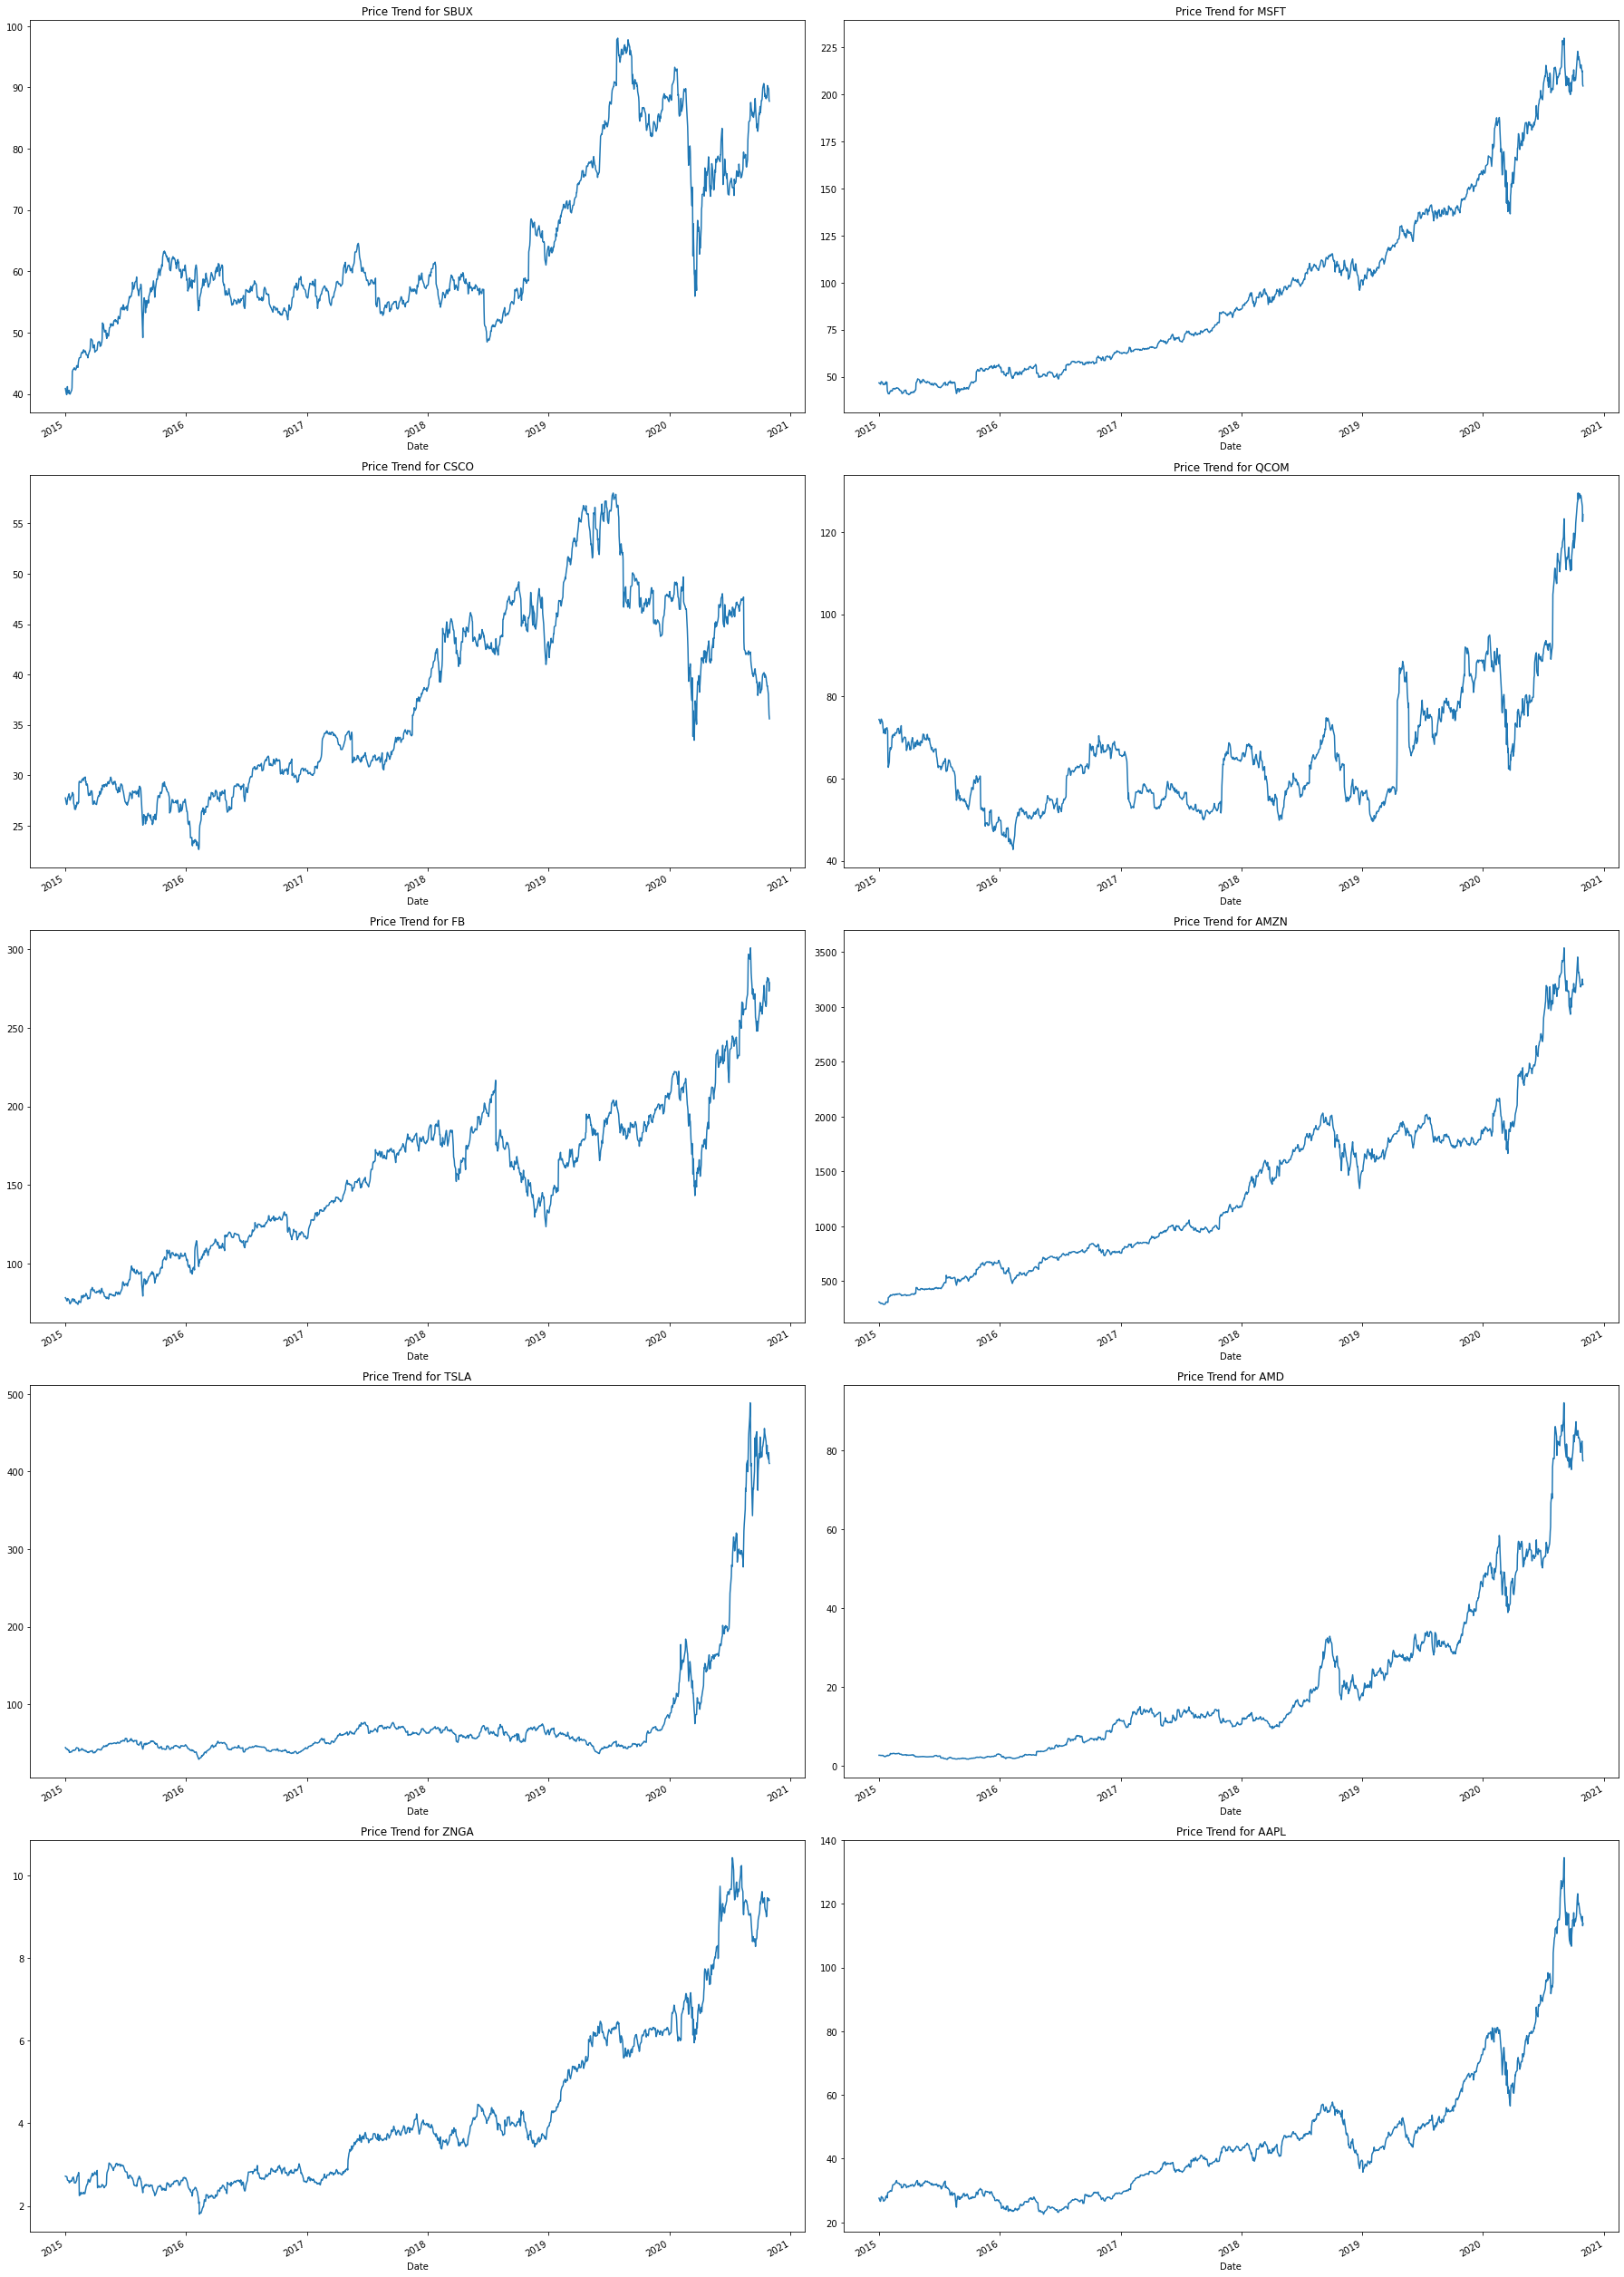

In [83]:
#price trend in Companies
plt.figure(figsize=(25, 35))

for i, company in enumerate(companies,1):
    plt.subplot(5,2,i)
    plt.title('Price Trend for ' + str(company))
    data[data['company']==company]['Average Price'].plot()
    plt.tight_layout()

In [84]:
#daily fluctutation on the stocks on each day
x = ((data["Close"] - data['Open'])/data['Open']) *100

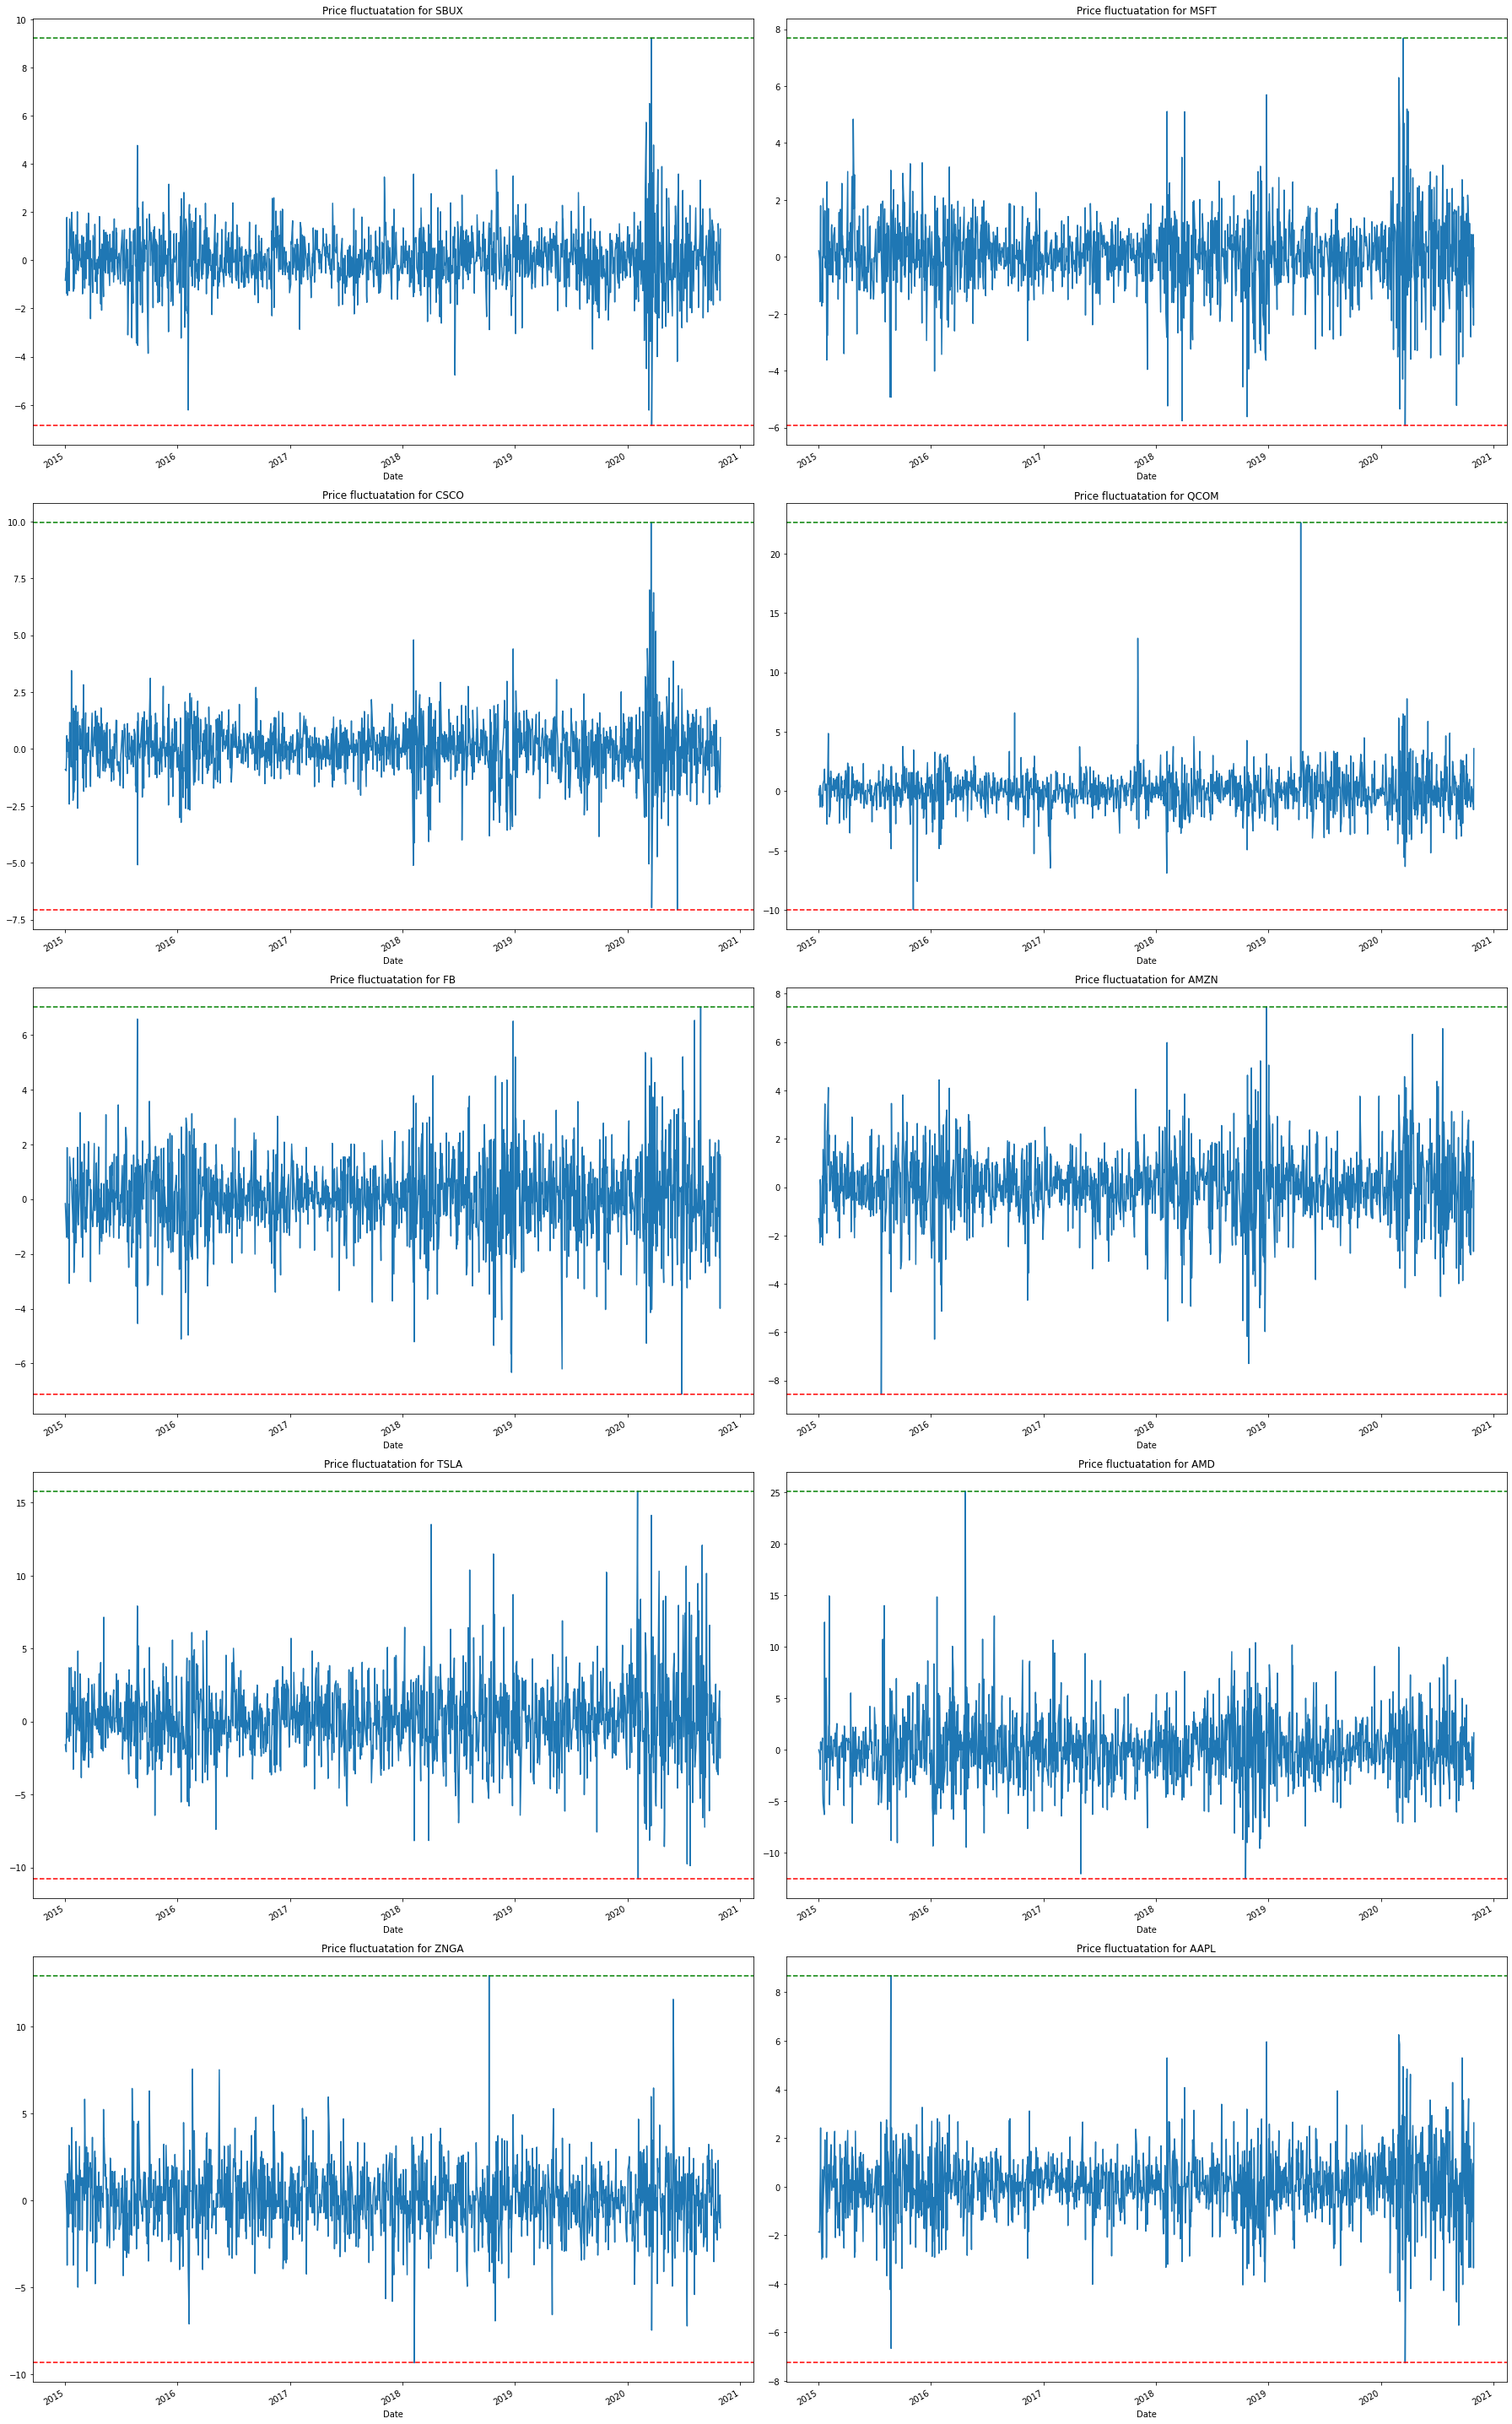

In [85]:
#ploting the price fluctuation of companies

plt.figure(figsize=(25,40))

for i, company in enumerate(companies,1):
    plt.subplot(5,2,i)
    #plt.title('Price Trend for ' + str(company))
    cmp = data[data['company']==company]
    fluc = ((cmp['Close']-cmp['Open'])/cmp['Open'])*100
    fluc.plot()
    plt.axhline(min(fluc), color='r', linestyle='--')
    plt.axhline(max(fluc), color='g', linestyle='--')
    plt.tight_layout()
    plt.title('Price fluctuatation for ' + str(company))



In [86]:
#Growth of each stock (scaled)
from sklearn.preprocessing import MinMaxScaler
close = data['Adj Close']
scale = MinMaxScaler(feature_range=(0,1))
data['close_scaled'] = scale.fit_transform(data[['Adj Close']])
data.head()

,Open,High,Low,Close,Adj Close,Volume,company,Average Price,close_scaled
Date,,,,,,,,,
2015-01-02,41.06,41.49,40.44,40.72,36.55,6886000,SBUX,40.89,0.009896
2015-01-05,40.07,40.33,39.74,39.94,35.85,11623800,SBUX,40.00,0.009697
2015-01-06,40.17,40.19,39.28,39.62,35.56,7664400,SBUX,39.89,0.009615
2015-01-07,39.88,40.62,39.70,40.59,36.44,9732600,SBUX,40.23,0.009864
2015-01-08,41.17,41.65,41.01,41.24,37.02,13170600,SBUX,41.20,0.010029


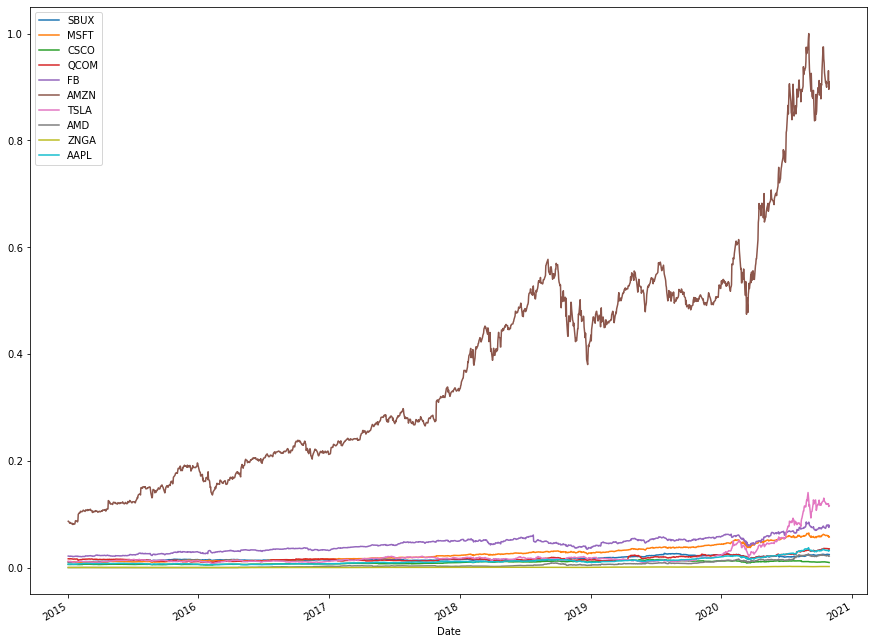

In [87]:
#comparing thr growth of all companies
plt.figure(figsize=(15,12))
for company in companies:
    cmp = data[data['company']==company]
    cmp['close_scaled'].plot()
    plt.legend()
    plt.legend(companies)

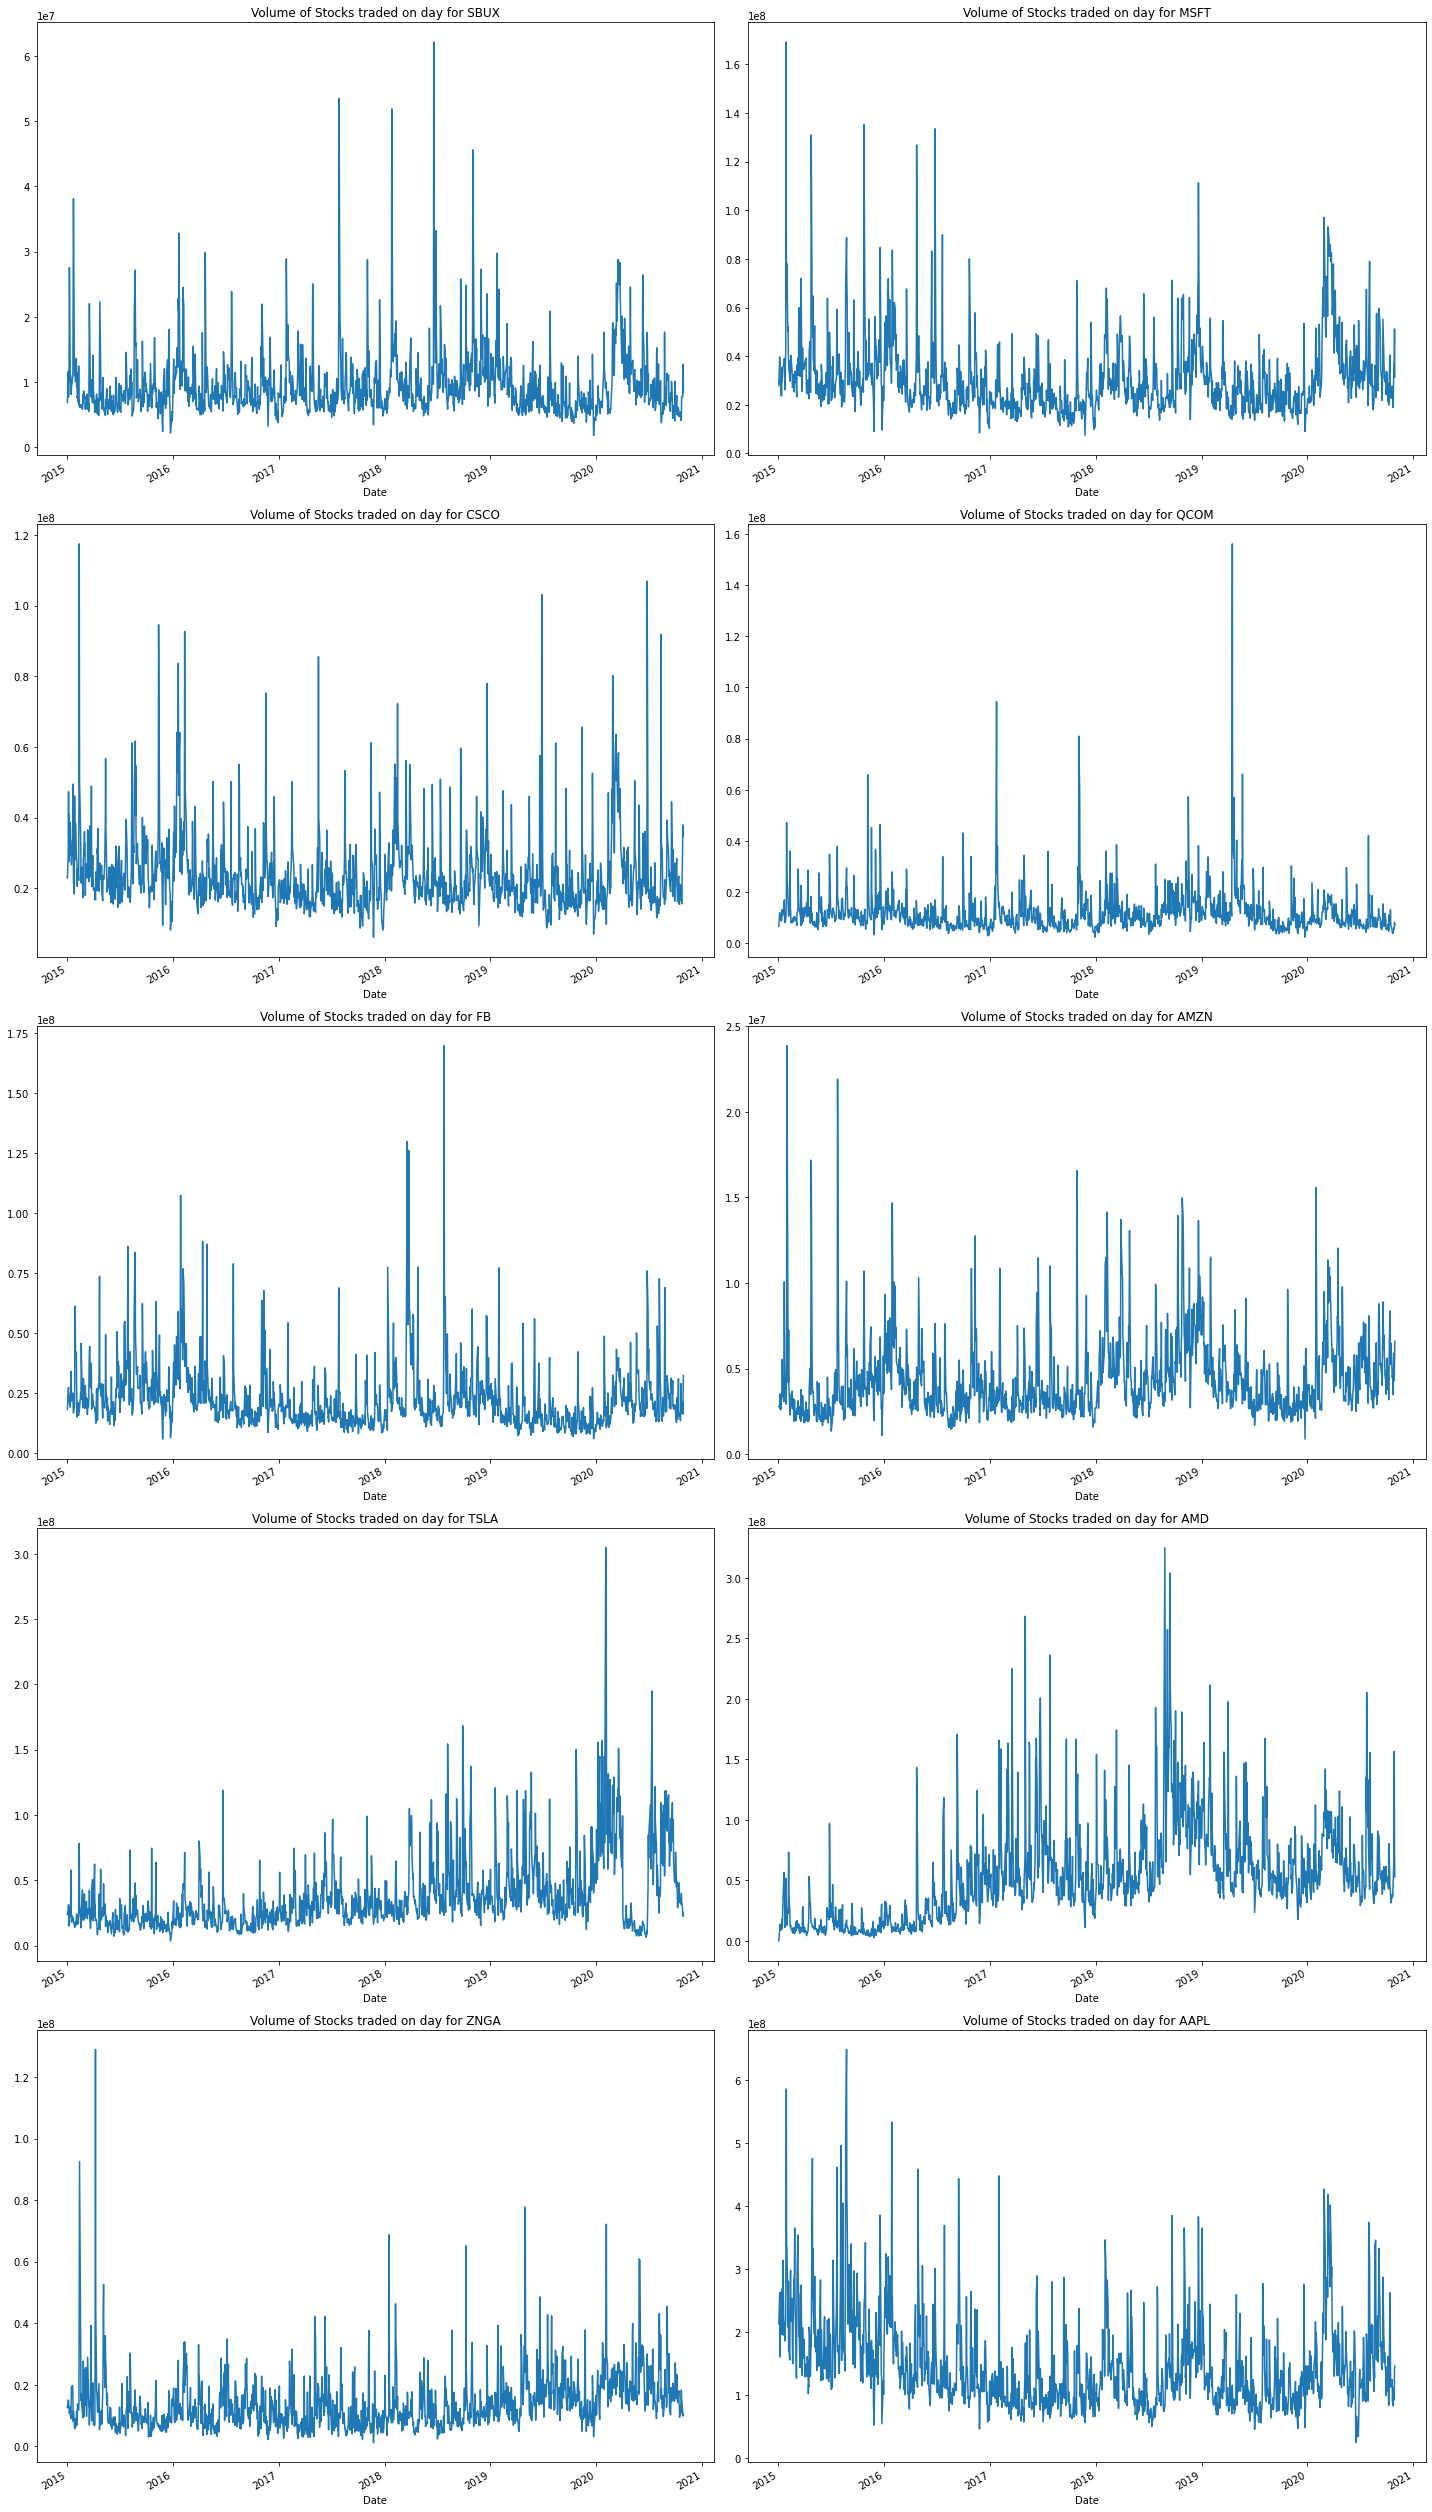

In [88]:
#volume traded per day
plt.figure(figsize=(20,35))

for i, company in enumerate(companies,1):
    plt.subplot(5,2,i)
    temp = data[data['company']==company]
    temp['Volume'].plot()
    plt.tight_layout()
    plt.title('Volume of Stocks traded on day for ' + str(company))


# Long Short Term Memory

In [89]:
#!pip install keras
#!pip install tensorflow
#!pip install keras==2.3.0

from subprocess import check_output
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential


In [90]:
#Function for performing the training of model with any company name passed in argument

def predict_stock(company_name):
    
    #getting company close price
    company = data[data['company']==company_name]
    print('\nThe Company been predicted here: ' +str(company_name))
    company_close = company.filter(['Close'])

    #Getting the training size 80% of total rows
    train_size = int(len(company)*0.8)
    
    #scaling the close data
    scale = MinMaxScaler(feature_range=(0,1))
    data_scaled = scale.fit_transform(company_close)
    
    #Splitting data into train/test split
    train_data = data_scaled[0:int(train_size), :]
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i,0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    print('\nThe training size is: ' +str(x_train.shape))


    test_data = data_scaled[train_size - 60:, :]

    x_test =[]
    y_test = company_close[train_size:]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

    print('\nThe testing size is: ' +str(x_test.shape)+ '\n\n')

    #LSTM model
    model = Sequential()
    model.add(LSTM(10, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(25, return_sequences= True))
    model.add(LSTM(50, return_sequences= True))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(50))
    model.add(Dense(50))
    model.add(Dense(25))
    model.add(Dense(25))
    model.add(Dense(1))
    model.add(Activation('linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    #Train the model
    model.fit(x_train, y_train, batch_size=16, epochs=10, validation_split=0.05, verbose=0)

    y_pred = model.predict(x_test)
    
    #inversing the scale close price to original value
    y_pred = scale.inverse_transform(y_pred)

    rmse = np.sqrt(np.mean(((y_pred - y_test)**2)))
    print('\nThe Root Mean Squared Error: ' +str(rmse) + '\n')

    # Plotting the Predicted stock price
    train_price = company.Close[:train_size]
    valid_price = pd.DataFrame(company.Close[train_size:])
    valid_price['Predicted'] = y_pred

    plt.figure(figsize=(16,8))
    plt.plot(train_price)
    plt.plot(valid_price[['Close', 'Predicted']])
    plt.legend(["Train", 'Validation', 'Predict'])
    plt.ylabel('Closing Price')
    plt.xlabel('Date')
    plt.title('Predicted Model')
    plt.show()
    
    return rmse



The Company been predicted here: CSCO

The training size is: (1114, 60, 1)

The testing size is: (294, 60, 1)



The Root Mean Squared Error: Close    2.065927
dtype: float64



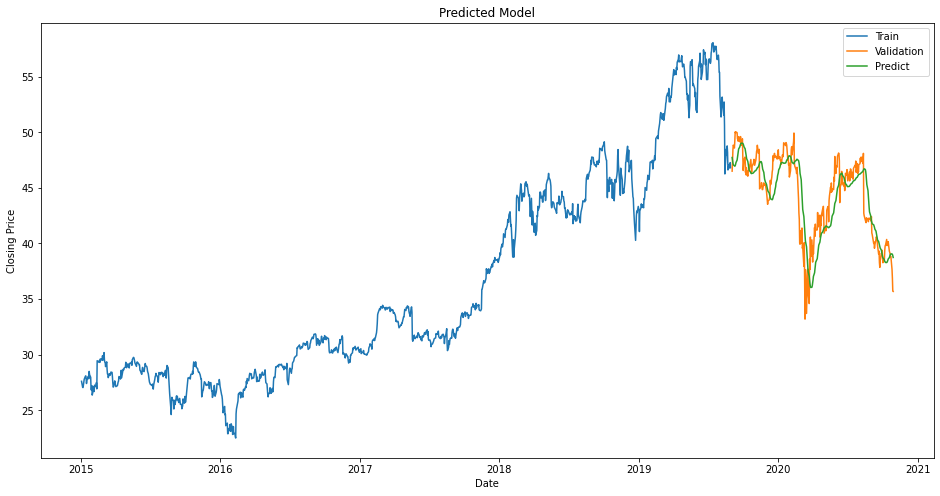

In [92]:
#Prediction of any company from the list
companies = ['SBUX','MSFT', 'CSCO','QCOM', 'FB', 'AMZN', 'TSLA','AMD','ZNGA', 'AAPL']

company_name = 'CSCO'
rmse_lstm=predict_stock(company_name)

In [93]:
#Adding a new variable Difference of High and Low price of the day
data['Difference_HL'] = data["High"] - data["Low"]

In [94]:
#Function to prepare data and split into train/test

def prep_data(company_name, scale):
    company = data[data['company']==company_name]    
    train_size = int(len(company)*0.8)
    
    x = company.drop(['company', 'Average Price', 'close_scaled', 'Close'], axis=1)
    y = company['Close']
    x = scale.fit_transform(x)
    y = scale.fit_transform(pd.DataFrame(y))
    
    x_train, y_train = x[0:train_size], y[0:train_size]
    x_test, y_test = x[train_size:], y[train_size:]
    
    return x_train, y_train, x_test, y_test, company


In [95]:
# function for plotting the results from models
def plot_result(company, y_pred):
    train_size = int(len(company)*0.8)
    train_price = company.Close[:train_size]
    valid_price = pd.DataFrame(company.Close[train_size:])
    valid_price['Predicted'] = scale.inverse_transform(pd.DataFrame(y_pred))

    plt.figure(figsize=(16,8))
    plt.plot(train_price)
    plt.plot(valid_price[['Close', 'Predicted']])
    plt.legend(["Train", 'Validation', 'Predict'])
    plt.ylabel('Closing Price')
    plt.xlabel('Date')
    plt.title('Predicted Model')
    plt.show()

# XGBOOST REGRESSOR

In [102]:
# Function defined for XGBoost Regressor model for training and predicting

def xgb_model(x_train, y_train, x_test, y_test, company):
    param_grid = {
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5, 7, 10],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.5, 0.7],
                'colsample_bytree': [0.5, 0.7],
                'n_estimators' : [10, 15, 20,25],
                'objective': ['reg:squarederror']
            }

    xgb = xg.XGBRegressor(seed=0)
    
    #Hyperparameter tuning
    grid_search = GridSearchCV(xgb, param_grid, cv=5)
    grid_search.fit(x_train, y_train)

    best_xgb = grid_search.best_estimator_



    #best XGB model from gridsearch

    best_xgb = best_xgb.fit(x_train, y_train)
    y_pred = best_xgb.predict(x_test)

    rmse = np.sqrt(mse(y_test, y_pred))
    print('The Root Mean Squared error : ' +str(rmse))
    
    return y_pred, rmse

The Root Mean Squared error : 0.01864938157159021


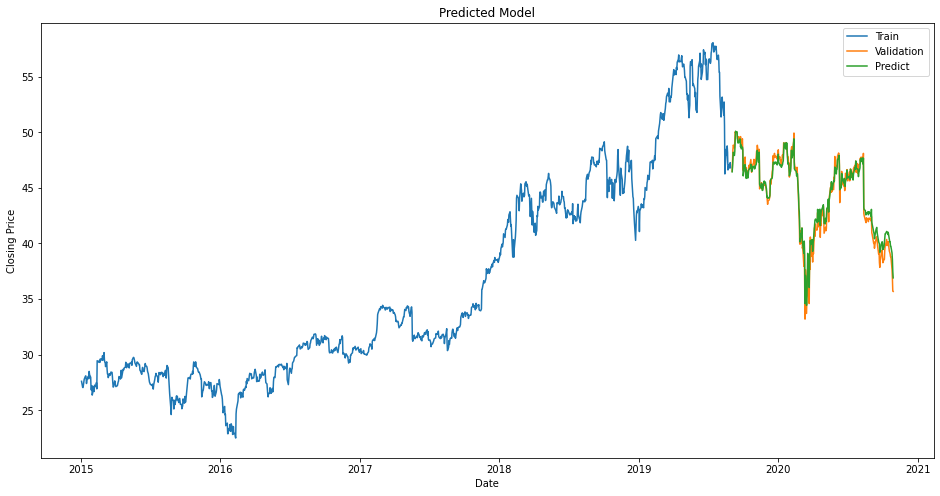

In [103]:
#Calling the function to train and predict CSCO stock price

x_train, y_train, x_test, y_test, company = prep_data('CSCO', scale)
y_pred, rmse_xgb = xgb_model(x_train, y_train, x_test, y_test, company)
plot_result(company, y_pred)

# Random Forest Regressor

In [98]:
#Defining function for training and predicting using Random Forest Regressor

def rfr_model(x_train, y_train, x_test, y_test, company):
    param_grid = {
                'max_features':['auto', 'sqrt', 'log2'],
                'max_depth': [5, 7, 10],
                'n_estimators' : [10, 15, 20,25],
                'min_samples_leaf':[1,3,5,7],
                'min_samples_split': [2,4,6,8]
            }

    rfr = RandomForestRegressor(random_state=0)

    grid_search = GridSearchCV(rfr, param_grid, cv=5)
    grid_search.fit(x_train, y_train.ravel())

    best_rfr = grid_search.best_estimator_



    #best Random Forest model from gridsearch

    best_rfr = best_rfr.fit(x_train, y_train.ravel())
    y_pred = best_rfr.predict(x_test)

    rmse = np.sqrt(mse(y_test, y_pred))
    print('The Root Mean Squared error : ' +str(rmse))
    
    return y_pred, rmse

The Root Mean Squared error : 0.03546926591850146


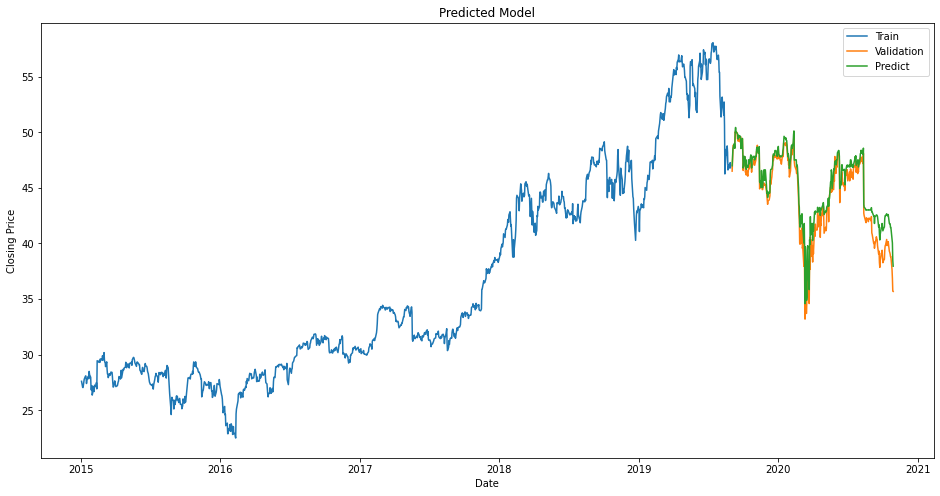

In [104]:
# Calling all the function to predict the CSCO stock using Random Forest
x_train, y_train, x_test, y_test, company = prep_data('CSCO', scale)
y_pred, rmse_rf = rfr_model(x_train, y_train, x_test, y_test, company)
plot_result(company, y_pred)

In [105]:
rmse = {
    'LSTM': rmse_lstm,
    'XGBoost': rmse_xgb,
    'Random Forest': rmse_rf
}
rmse_table = pd.DataFrame(rmse)


The Root Mean Squared Error for: CSCO



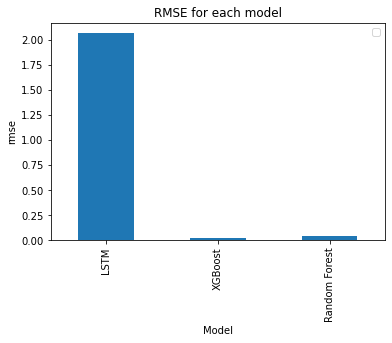

In [106]:
rmse_table.T.plot(kind='bar')
plt.title('RMSE for each model')
plt.xlabel('Model')
plt.ylabel('rmse')
plt.legend('')
print('\nThe Root Mean Squared Error for: ' +str(company['company'][0]) + '\n')